In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset

%matplotlib inline

In [2]:
shp_filename = 'out_shape/mycoast'
mlon_c = 180.0

## Working?

Global:

√: moll; hammer; robin; eck4; kav7; mbpfpq; sinu; cyl; mill; gall; cea;

×: merc; vandg;

Satellite:

√: 

×: ortho; geos; nsper;

Polar:

√: spstere; splaea; spaeqd;

×: npstere; nplaea; npaeqd;

High Lat:

√: laea; stere;

×: lcc; eqdc; aea;


/home/ollie/psong/miniconda3/envs/psong_wind/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ollie/psong/miniconda3/envs/psong_wind/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


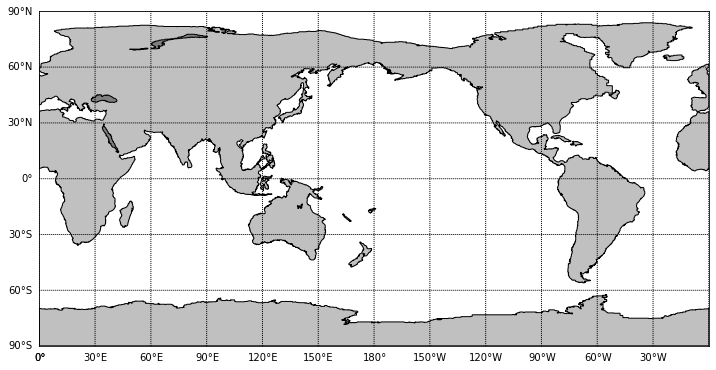

In [3]:
# Global map
fig, ax = plt.subplots(1,1,figsize=(12,8))
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=mlon_c-180,urcrnrlon=mlon_c+180,ax=ax)

m.drawparallels(np.arange(-90.,91.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(0.,361.,30.),labels=[0,0,0,1])

m.readshapefile(shp_filename, 'mycoast', drawbounds = False)

land_patch, lake_patch = [], []

for info, shape in zip(m.mycoast_info, m.mycoast):
    if info['Polygon']=='Land':
        land_patch.append(Polygon(np.array(shape),True))
    elif info['Polygon']=='Lake':
        lake_patch.append(Polygon(np.array(shape),True))
    else:
        land_patch.append(Polygon(np.array(shape),True))
    
ax.add_collection(PatchCollection(land_patch, facecolor='silver', edgecolor='k', linewidths=1.0))
ax.add_collection(PatchCollection(lake_patch, facecolor='gray', edgecolor='k', linewidths=1.0))

/home/ollie/psong/miniconda3/envs/psong_wind/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ollie/psong/miniconda3/envs/psong_wind/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


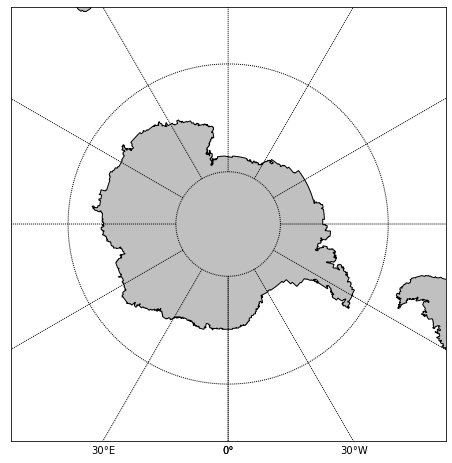

In [4]:
# Global map
fig, ax = plt.subplots(1,1,figsize=(12,8))
m = Basemap(projection='spstere',boundinglat=-50,lon_0=0,ax=ax)

m.drawparallels(np.arange(-90.,91.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(0.,361.,30.),labels=[0,0,0,1])

m.readshapefile(shp_filename, 'mycoast', drawbounds = False)

land_patch, lake_patch = [], []

for info, shape in zip(m.mycoast_info, m.mycoast):
    if info['Polygon']=='Land':
        land_patch.append(Polygon(np.array(shape),True))
    elif info['Polygon']=='Lake':
        lake_patch.append(Polygon(np.array(shape),True))
    else:
        anta_poly = np.array(shape)
        anta_lon, anta_lat = m(anta_poly[:,0],anta_poly[:,0],inverse=True)
        anta_index = anta_lat>-89.0
        land_patch.append(Polygon(anta_poly[anta_index,:],True))
    
ax.add_collection(PatchCollection(land_patch, facecolor='silver', edgecolor='k', linewidths=1.0))
ax.add_collection(PatchCollection(lake_patch, facecolor='gray', edgecolor='k', linewidths=1.0))